#Breast Cancer Detection using ANN

#Data Wrangling

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data #Getting data from Breast Cancer Wisconsin (Diagnostic) Data Set
import pandas as pd
read_file = pd.read_csv (r'/content/breast-cancer-wisconsin.data')
read_file.to_csv (r'/content/breast-cancer-wisconsin.csv', index=None) #Convert to.csv
data = pd.read_csv('breast-cancer-wisconsin.csv', header = None) 
data.columns = ['id','ct','ucsize','ucshape','ma','secs','bn','bc','nn','miti','class']
df = pd.DataFrame(data) #Convert to Dataframe
df

--2022-01-13 14:51:52--  http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.06s   

2022-01-13 14:51:52 (305 KB/s) - ‘breast-cancer-wisconsin.data’ saved [19889/19889]



,id,ct,ucsize,ucshape,ma,secs,bn,bc,nn,miti,class
0,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,1002945,5,4,4.0,5.0,7,10,3,2.0,1.0,2.0
2,1015425,3,1,1.0,1.0,2,2,3,1.0,1.0,2.0
3,1016277,6,8,8.0,1.0,3,4,3,7.0,1.0,2.0
4,1017023,4,1,1.0,3.0,2,1,3,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1.0,1.0,3,2,1,1.0,1.0,2.0
695,841769,2,1,1.0,1.0,2,1,1,1.0,1.0,2.0
696,888820,5,10,10.0,3.0,7,3,8,10.0,2.0,4.0
697,897471,4,8,6.0,4.0,3,4,10,6.0,1.0,4.0


   Iloc+1 | Attribute                     |   Tag
   -----|-------------------------|-------------
    1 | Sample code number         |   id number
    2 | Clump Thickness            |   ct
    3 | Uniformity of Cell Size    |   ucszie
    4 | Uniformity of Cell Shape   |   ucshape
    5 | Marginal Adhesion          |   ma
    6 | Single Epithelial Cell Size|   secs
    7 | Bare Nuclei                |   bn
    8 | Bland Chromatin            |   bc
    9 | Normal Nucleoli            |   nn
    10 | Mitoses                   |   miti
    11 | Class: malignant->4 benign->2 |   class



#Data Cleaning

In [2]:
# replacing bn's columns's value ? -> 0 -> mean of bn
df['bn'] = df['bn'].replace('?',0)
df['bn'] = df['bn'].astype(float)
mean = df['bn'].mean()
df['bn'] = df['bn'].replace(0,mean)

df['class'] = df['class'].astype(int) # replacing class's columns's type float64 -> int64
df['class'] = df['class'].replace(2,0).replace(4,1) # replacing class's columns's value 2 -> 0 & 4 -> 1
print(df)

          id  ct  ucsize  ucshape   ma  secs    bn  bc    nn  miti  class
0    1000025   5       1      1.1  1.2     2   1.3   3   1.4   1.5      0
1    1002945   5       4      4.0  5.0     7  10.0   3   2.0   1.0      0
2    1015425   3       1      1.0  1.0     2   2.0   3   1.0   1.0      0
3    1016277   6       8      8.0  1.0     3   4.0   3   7.0   1.0      0
4    1017023   4       1      1.0  3.0     2   1.0   3   1.0   1.0      0
..       ...  ..     ...      ...  ...   ...   ...  ..   ...   ...    ...
694   776715   3       1      1.0  1.0     3   2.0   1   1.0   1.0      0
695   841769   2       1      1.0  1.0     2   1.0   1   1.0   1.0      0
696   888820   5      10     10.0  3.0     7   3.0   8  10.0   2.0      1
697   897471   4       8      6.0  4.0     3   4.0  10   6.0   1.0      1
698   897471   4       8      8.0  5.0     4   5.0  10   4.0   1.0      1

[699 rows x 11 columns]


#Loading the data as per train and test case ratio 80:20

In [3]:
X = df.iloc[:, 1:10] #independent variable
Y = df.iloc[:, 10] #dependent variable

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #Separate our data to train and test set -> 80% train, 20% test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Defining the model definition

In [4]:
from keras.models import Sequential
from keras.layers import Dense
def getmodel():
  classifier = Sequential()
  classifier.add(Dense(units = 5, activation = 'relu', input_dim=9))
  classifier.add(Dense(units = 3, activation = 'relu'))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
  return classifier
  classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)

#Getting the best model without overfitting using EarlyStopping

In [9]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
filepath = "w.hdf5" #saving the weight
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
callbacks_list = [checkpoint,es]
modelupd=getmodel()
history=modelupd.fit(X_train, Y_train, batch_size = 10, epochs = 100, validation_data=(X_test,Y_test),callbacks=callbacks_list,verbose=1)

Epoch 1/100
39/56 [===================>..........] - ETA: 0s - loss: 0.3196 - accuracy: 0.2333 
Epoch 00001: val_accuracy improved from -inf to 0.60714, saving model to w.hdf5
56/56 [==============================] - 1s 8ms/step - loss: 0.3047 - accuracy: 0.3202 - val_loss: 0.2619 - val_accuracy: 0.6071
Epoch 2/100
39/56 [===================>..........] - ETA: 0s - loss: 0.2340 - accuracy: 0.6769
Epoch 00002: val_accuracy improved from 0.60714 to 0.78571, saving model to w.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.7281 - val_loss: 0.1941 - val_accuracy: 0.7857
Epoch 3/100
36/56 [==================>...........] - ETA: 0s - loss: 0.1680 - accuracy: 0.8556
Epoch 00003: val_accuracy improved from 0.78571 to 0.91429, saving model to w.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.8766 - val_loss: 0.1352 - val_accuracy: 0.9143
Epoch 4/100
34/56 [=================>............] - ETA: 0s - loss: 0.1140 - acc

In [11]:
modelupd.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 50        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


#Model Accuracy Graph of 'modelupd'

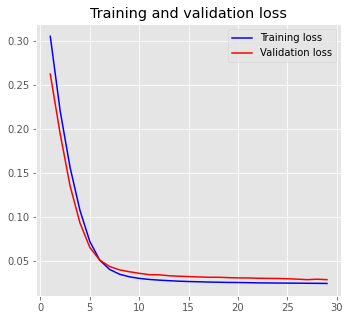

In [12]:
#This show whether this graph is under/over/just right fitting.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history) #Result show our graph is just right fitting.

#Breast_Cancer_Detection Function Definition

In [13]:
def breastcancerdetect(a): 
  arrvalue=modelupd.predict(a)
  e=(1 if arrvalue.item((0, 0))>=0.5 else 0)
  print("Type of Breast Cancer in terms of level:")
  print('benign') if e==0 else print('malignant')
  print("\nNote:-\nmalignant -> dangerous spreading cancer\nbenign -> gentle spreading cancer")

In [14]:
breastcancerdetect([[-0.16118879, -0.70346824, -0.75031388, -0.64276997, -0.55612245,-0.72173222, -0.59660276, -0.62025621, -0.31540386]])

Type of Breast Cancer in terms of level:
benign

Note:-
malignant -> dangerous spreading cancer
benign -> gentle spreading cancer
